# Modelo SVM

In [107]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# se importa el dataset
df = pd.read_csv('dataset.csv')
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [108]:
# hay dos filas de nombres, se elimina la segunda
df = df.drop(0)
# definimos el índice
df.set_index('ID', inplace=True)
# se convierte los datos a numéricos
for c in df:
    df[c] = df[c].astype('float64')

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [110]:
# se muestra información del dataset
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [111]:
# Se agregan nuevas variables

#variables para Variación mensual de la deuda, para identificar endeudamiento previo a caer en incumplimienito
df['X24']=df['X13']-df['X12']
df['X25']=df['X14']-df['X13']
df['X26']=df['X15']-df['X14']
df['X27']=df['X16']-df['X15']
df['X28']=df['X17']-df['X16']

#Porcentaje mensual de crédito utilizado
df['X29']=df['X12']/df['X1']
df['X30']=df['X13']/df['X1']
df['X31']=df['X14']/df['X1']
df['X32']=df['X15']/df['X1']
df['X33']=df['X16']/df['X1']
df['X34']=df['X17']/df['X1']

#Porcentaje mensual de pago respecto a la deuda
#Pagando deuda de mes anterior
df['X35']=(df.X18/df.X13).where((df.X13 > 0)&(df.X18 > 0), 0)
df['X36']=(df.X19/df.X14).where((df.X14 > 0)&(df.X19 > 0), 0)
df['X37']=(df.X20/df.X15).where((df.X15 > 0)&(df.X20 > 0), 0)
df['X38']=(df.X21/df.X16).where((df.X16 > 0)&(df.X21 > 0), 0)
df['X39']=(df.X22/df.X17).where((df.X17 > 0)&(df.X22 > 0), 0)
#df['X40']=(df.X23/df.X17).where((df.X17 > 0)&(df.X23 > 0), 0)

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.155100,0.034450,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,0.014375,0.022350,0.027267,0.028792,0.027175,0.000000,0.372856,0.305623,0.289436,0.000000
3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,0.155856,0.150656,0.159233,0.166089,0.172767,0.108220,0.110628,0.069779,0.066899,0.064313
4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,0.964660,0.985820,0.566280,0.579180,0.590940,0.041465,0.040961,0.042382,0.037985,0.036180
5,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,0.113400,0.716700,0.418800,0.382920,0.382620,0.352734,1.023608,0.477555,0.470072,0.036015


In [112]:
# Separamos las columnas
X = df.drop('Y', axis=1)
y = df['Y']

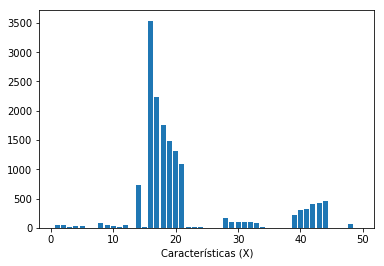

In [137]:
# Realizamos las operaciones propuestas por https://github.com/kaankarakeben/UCI_Credit_Card-SVM-Classifier

# Convirtiendo variables categoricas 'sex' (X2), 'marriage' (X4) y 'education' (X3) a one-hot
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse=False)
sex = OHE.fit_transform(X[['X2']])
marriage = OHE.fit_transform(X[['X4']])
education = OHE.fit_transform(X[['X3']])

cat_variables = np.hstack((sex, marriage, education))
#print(cat_variables[0])

cat_var_names = ['X2','X4','X3']
num_variables = X.drop(cat_var_names, axis=1)

# Escalando variables numericas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(num_variables)
stdz_num_variables = scaler.transform(num_variables)

# Se junta las variables numericas con categoricas
final_X = np.hstack((cat_variables,stdz_num_variables))

# Se seleccionan las 10 mejores caracteristicas
from sklearn.feature_selection import SelectKBest

test = SelectKBest(k=10)
fit = test.fit(final_X,y)
np.set_printoptions(precision=1)
#print(fit.scores_)
# Mostramos las variables por importancia
plt.xlabel("Características (X)")
plt.bar(np.arange(1,50),fit.scores_)
plt.show()

# filtramos los datos con las 10 mejores
features = fit.transform(final_X)

#features.shape

In [138]:
# Dividir el conjunto en tres: Entrenamiento(24,000), Validacion(3,000), Test (3,000)
# 3,000 es suficiente par dar precision de 0.033% en validacion y test
# Usamos para todos para que comparamos manzanas con manzanas.

from sklearn.model_selection import train_test_split
# Siempre queremos lo mismo conjunto de trainval y test
# Entonces random_state = 77
X_entrenval, X_test, y_entrenval, y_test = train_test_split(features, y, test_size=3000, random_state=77)

In [139]:
# Mejor que permitimos que cambia los conjuntos de train y val
# Entonces por casualidad entre entren y val
X_entren, X_val, y_entren, y_val = train_test_split(X_entrenval, y_entrenval, test_size=3000)
X_entrenval.shape, X_entren.shape, X_val.shape, X_test.shape, y_entrenval.shape, y_entren.shape, y_val.shape, y_test.shape

((27000, 10),
 (24000, 10),
 (3000, 10),
 (3000, 10),
 (27000,),
 (24000,),
 (3000,),
 (3000,))

In [140]:
!pip install imblearn

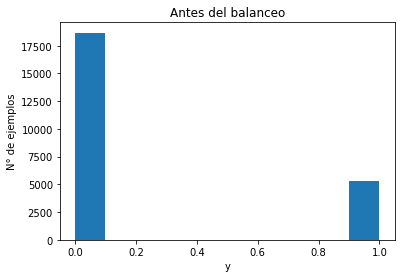

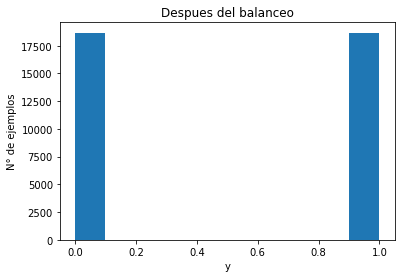

In [143]:
# Corrigiendo desbalanceo con SMOTE

plt.title('Antes del balanceo')
plt.ylabel('N° de ejemplos')
plt.xlabel('y')
plt.hist(y_entren)
plt.show()

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_entren_os, y_entren_os = smote.fit_sample(X_entren, y_entren)

plt.title('Despues del balanceo')
plt.ylabel('N° de ejemplos')
plt.xlabel('y')
plt.hist(y_entren_os)
plt.show()

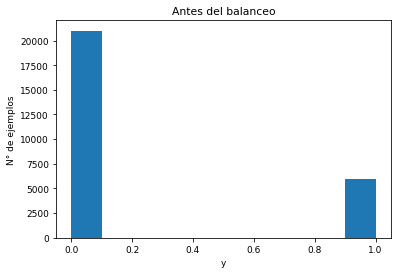

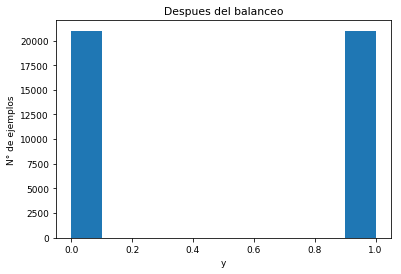

In [188]:
# Balanceo para test

plt.title('Antes del balanceo')
plt.ylabel('N° de ejemplos')
plt.xlabel('y')
plt.hist(y_entrenval)
plt.show()

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_entrenval_os, y_entrenval_os = smote.fit_sample(X_entrenval, y_entrenval)

plt.title('Despues del balanceo')
plt.ylabel('N° de ejemplos')
plt.xlabel('y')
plt.hist(y_entrenval_os)
plt.show()

## Entrenamiento sin balanceo

In [162]:
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

# Usamos SVC de sklearn solo ajustando probability para imprimir la curva de probaibilidades
svcModel = SVC(probability=True)
svcModel.fit(X_entren,y_entren)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [145]:
!pip install import-ipynb

Costo de Entrenamiento:
-----------------------
Exactitud:     0.823125
Precisión:     0.6923620933521923
Exhaustividad: 0.36714794674667167
AUC:           0.6602708180725376
Costo por cliente: 0.6577916666666667

Costo de Validación:
--------------------
Exactitud:     0.8256666666666667
Precisión:     0.7002652519893899
Exhaustividad: 0.3916913946587537
AUC:           0.6715550696423604
Costo por cliente: 0.633

Probabilidad de no pagar:
-------------------------


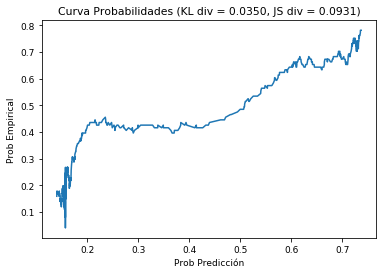

In [175]:
from ipynb.fs.full.costo import custom_cost
#import import_ipynb
#from costo import custom_cost

# función de costo
print('Costo de Entrenamiento:')
print('-----------------------')
custom_cost(svcModel, X_entren, y_entren)
print()
print('Costo de Validación:')
print('--------------------')
custom_cost(svcModel, X_val, y_val)
print()

from ipynb.fs.full.prob import mostrarPQ

# mostrar probabilidades empiricales vs predicción
print('Probabilidad de no pagar:')
print('-------------------------')
y_val_prob = svcModel.predict_proba(X_val)[:,1] # Probability of category +1
mostrarPQ(y_val, y_val_prob)

In [ ]:
!pip install tabulate

In [183]:
import sys
from tabulate import tabulate

def imprimirCalidad(calidad):
    print(tabulate([['Exactitud:', calidad.accuracy],
                    ['Precisión:', calidad.precision],
                    ['Exhaustividad:', calidad.recall],
                    ['AUC:', calidad.AUC],
                    ['Costo por cliente:', calidad.cost]]))

def buscarSvcKernel(X_entren, y_entren, X_val, y_val, printdetail=False):       
    # busqueda del mejor kernel
    kernels = ['linear','poly','rbf','sigmoid']

    mejor_modelo = None
    #mejor_score = 0
    mejor_costo = sys.float_info.max
    mejor_kernel = None
    mejor_train_cost = None
    mejor_valid_cost = None

    for kernel in kernels:
        model = SVC(kernel=kernel,probability=True)
        model.fit(X_entren, y_entren)

        if printdetail:
            print(tabulate([['Kernel:',kernel]]))
            print()
            print("Costo de entrenamiento:")
            print("-----------------------")
            trainCost = custom_cost(model, X_entren, y_entren, True)
            print()
            print("Costo de validación:")
            print("--------------------")
            validCost = custom_cost(model, X_val, y_val, True)
            print()
        else:
            trainCost = custom_cost(model, X_entren, y_entren, False)
            validCost = custom_cost(model, X_val, y_val, False)

        if validCost.cost < mejor_costo:
            mejor_costo = validCost.cost
            mejor_kernel = kernel
            mejor_modelo = model
            mejor_train_cost = trainCost
            mejor_valid_cost = validCost

    print('*** Mejor resultado ***')
    print()
    print(tabulate([['Kernel:',mejor_kernel]]))
    print()
    print("Costo de entrenamiento:")
    imprimirCalidad(mejor_train_cost)
    print()
    print("Costo de validación:")
    imprimirCalidad(mejor_valid_cost)
    print()
    
    print('\nProbabilidad de no pagar')
    y_val_prob = mejor_modelo.predict_proba(X_val)[:,1] # Using probability of category +1
    mostrarPQ(y_val, y_val_prob)

In [ ]:
buscarSvcKernel(X_entren, y_entren, X_val, y_val, printdetail=True)

## Entrenamiento con oversampling

In [185]:
osModel = SVC(probability=True)
osModel.fit(X_entren_os,y_entren_os)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
!pip install --upgrade scipy

Requirement already up-to-date: scipy in /home/alain/anaconda3/lib/python3.7/site-packages (1.3.0)


Costo de Entrenamiento:
-----------------------
Exactitud:     0.7167461295334012
Precisión:     0.7854925204628845
Exhaustividad: 0.5963464938126105
AUC:           0.716746129533401
Costo por cliente: 0.7923876359350726

Costo de Validación:
--------------------
Exactitud:     0.7683333333333333
Precisión:     0.48714810281517745
Exhaustividad: 0.5905044510385756
AUC:           0.7051834379010591
Costo por cliente: 0.467

Probabilidad de no pagar:
-------------------------


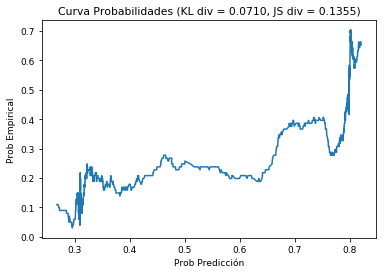

In [186]:
# función de costo
print('Costo de Entrenamiento:')
print('-----------------------')
custom_cost(osModel, X_entren_os, y_entren_os)
print()
print('Costo de Validación:')
print('--------------------')
custom_cost(osModel, X_val, y_val)
print()

# mostrar probabilidades empiricales vs predicción
print('Probabilidad de no pagar:')
print('-------------------------')
y_val_prob = osModel.predict_proba(X_val)[:,1] # Probability of category +1
mostrarPQ(y_val, y_val_prob)

-------  ------
Kernel:  linear
-------  ------

Costo de entrenamiento:
-----------------------
Exactitud:     0.681764611346226
Precisión:     0.7771605946740728
Exhaustividad: 0.5096694701880323
AUC:           0.6817646113462259
Costo por cliente: 1.0440617131836931

Costo de validación:
--------------------
Exactitud:     0.777
Precisión:     0.5034387895460798
Exhaustividad: 0.543026706231454
AUC:           0.6939123213014536
Costo por cliente: 0.5116666666666667

-------  ----
Kernel:  poly
-------  ----

Costo de entrenamiento:
-----------------------
Exactitud:     0.7049070552311566
Precisión:     0.776173285198556
Exhaustividad: 0.5758825735254728
AUC:           0.7049070552311566
Costo por cliente: 0.8553865109551615

Costo de validación:
--------------------
Exactitud:     0.7636666666666667
Precisión:     0.47909199522102747
Exhaustividad: 0.5949554896142433
AUC:           0.7037546149704922
Costo por cliente: 0.4666666666666667

-------  ---
Kernel:  rbf
-------  ---

Cos

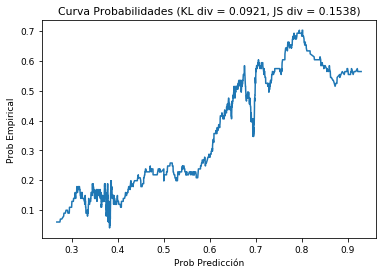

In [187]:
# busquedad del mejor kernel con oversampling
buscarSvcKernel(X_entren_os, y_entren_os, X_val, y_val, printdetail=True)

## Test

In [ ]:
testModel = SVC(kernel='rbf',probability=True)
testModel.fit(X_entrenval_os,y_entrenval_os)

# función de costo
print('Costo de Entrenamiento:')
print('-----------------------')
custom_cost(testModel, X_entrenval_os, y_entrenval_os)
print()
print('Costo de Validación:')
print('--------------------')
custom_cost(testModel, X_test, y_test)
print()

# mostrar probabilidades empiricales vs predicción
print('Probabilidad de no pagar:')
print('-------------------------')
y_test_prob = testModel.predict_proba(X_test)[:,1] # Probability of category +1
mostrarPQ(y_test, y_test_prob)